In [1]:
import pynbody
import simulation
import matplotlib.pyplot as plt
import ipywidgets as iw
import numpy as np

In [2]:
MAX_GALAXY_ID = 1887288

In [3]:
sim = simulation.Simulation('~/sim/MySimulations/Moria8Gyr_tidal/Strip/strip4/out')

loading simulation: ~/sim/MySimulations/Moria8Gyr_tidal/Strip/strip4/out


In [4]:
sim_no_cl = simulation.MoriaSim('69002_p200.0_a600.0_r600.0_c8.15_z0', kicked=True)

loading simulation: 69002_p200.0_a600.0_r600.0_c8.15_z0
No sumfile found


In [5]:
def gas_axis(sim, ax, i, max_galaxy_id=None, **kwargs):
    if max_galaxy_id is not None:
        cluster_galaxy = sim.snap_list[i]
        snap = cluster_galaxy.g[cluster_galaxy.g['iord'] < max_galaxy_id]
    else:
        snap = sim.snap_list[i]
    snap.g['smooth'] /= 2
    snap.properties.pop('boxsize', None)
    snap_time_gyr = snap.properties['time'].in_units("Gyr")
    pynbody.analysis.halo.center(snap)
    # If not provided use a default value for width
    width = kwargs.get("width", 20)
    kwargs.pop("width", None)
    try:
        im = pynbody.plot.sph.image(snap.g, qty="rho", units="g cm^-2", subplot=ax, #title=title,
                       ret_im=True, show_cbar=False, width=width, **kwargs)
        ax.set_xlabel('x [' + str(snap.g['x'].units) + ']')
        ax.set_ylabel('y [' + str(snap.g['y'].units) + ']')
        snap_num = int(snap.ancestor.filename[-4:])
        title = '$t={:5.2f}$ Gyr, snap={}'.format(snap.properties['time'].in_units("Gyr"), snap_num)
        ax.set_title(title)
    except Exception as e:
        raise(e)
    finally:
        snap.g['smooth'] *= 2
    return im

In [6]:
def plot_galaxy_without_cluster(sim, i, max_galaxy_id=None, **kwargs):
    fig, ax = plt.subplots(1, figsize=(8,8))
    im = gas_axis(sim, ax, i, max_galaxy_id, **kwargs)
    fig.tight_layout()
    fig.subplots_adjust(top=0.92, bottom=0.15)
    cbar_ax = fig.add_axes([0.23, 0.07, 0.61, 0.02])
    fig.colorbar(im, cax=cbar_ax, orientation='horizontal').set_label("rho [g cm^-2]")
    return fig

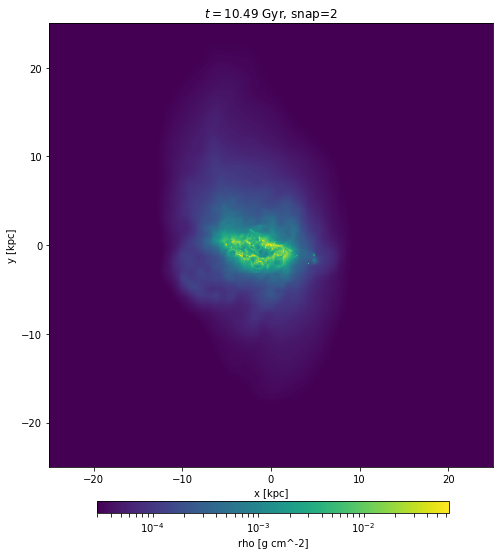

In [7]:
plot_galaxy_without_cluster(sim, 0, MAX_GALAXY_ID,vmin=3e-5, width=50);

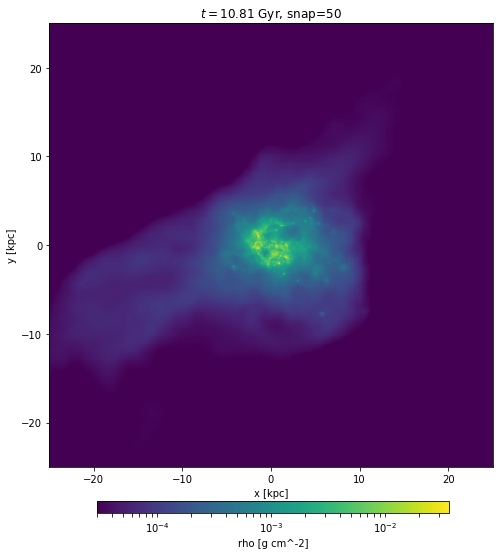

In [8]:
plot_galaxy_without_cluster(sim_no_cl, 49, 1000000000, vmin=3e-5, width=50);

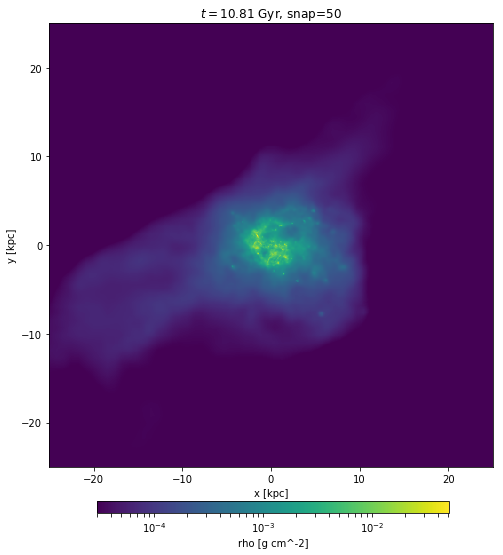

In [9]:
plot_galaxy_without_cluster(sim_no_cl, 49, vmin=3e-5, width=50);

The time of the simulation ith the gas has taken the time of the cluster. Actually the first snapshot of the simulation with the gas is `snapshot_0010`. Moreover the initial snapshot of the simulation without the gas is `snapshot_001`. From this, the offset between the snapshot is 9.

In [10]:
sim[0].ancestor.filename, sim_no_cl[0].ancestor.filename

('/home/michele/sim/MySimulations/Moria8Gyr_tidal/Strip/strip4/out/snapshot_0002',
 '/home/michele/sim/MySimulations/Moria8Gyr_tidal/sim69002_p200.0_a600.0_r600.0_c8.15_z0/out/snapshot_0001')

In practice `out/snapshot_0002` corresponds to `sim69002_p200.0_a600.0_r600.0_c8.15_z0/out/snapshot_0010`

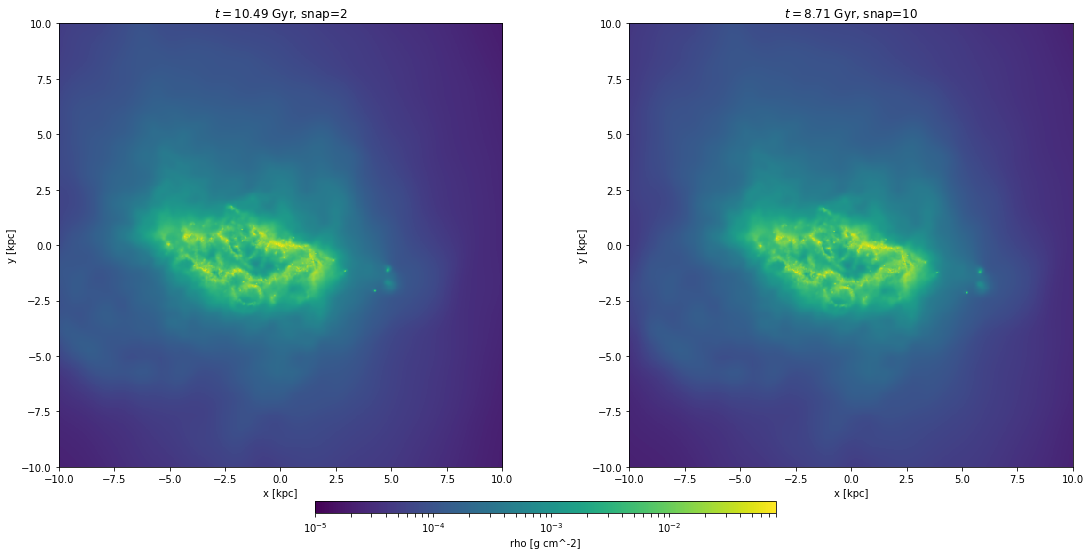

In [11]:
i=0
offset=9
width=20
vmin, vmax = 1e-5, 8e-2
kwargs = {"width": width, "vmin":vmin, "vmax":vmax}
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
im0 = gas_axis(sim, ax[0], i, max_galaxy_id=MAX_GALAXY_ID, **kwargs)
im1 = gas_axis(sim_no_cl, ax[1], i+offset, **kwargs)
fig.tight_layout() # only plots above are affected
fig.subplots_adjust(top=0.92, bottom=0.15)
cbar_ax = fig.add_axes([0.3, 0.07, 0.4, 0.02])
fig.colorbar(im0, cax=cbar_ax, orientation='horizontal').set_label("rho [g cm^-2]")
   
# ax[0].set_title()

In [12]:
def compare_gas_cluster(i, sim_with_gas, sim_no_gas, offset=9, **kwargs):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    im0 = gas_axis(sim_with_gas, ax[0], i, max_galaxy_id=MAX_GALAXY_ID, **kwargs)
    im1 = gas_axis(sim_no_gas, ax[1], i+offset, **kwargs)
    fig.tight_layout() # only plots above are affected
    fig.subplots_adjust(top=0.92, bottom=0.15)
    cbar_ax = fig.add_axes([0.3, 0.07, 0.4, 0.02])
    fig.colorbar(im0, cax=cbar_ax, orientation='horizontal').set_label("rho [g cm^-2]")
    return fig

In [13]:
rho_min, rho_max = 1e-5, 8e-2
step = 1e-5
_snap_slider = iw.IntSlider(min=0,max=min(len(sim), len(sim_no_cl))-1,step=1,value=0, continuous_update=False, description='Snap:')
_width_slider = iw.IntSlider(min=5,max=1000,step=10,value=20, continuous_update=False, description='Width (kpc):')
_vminmax = iw.FloatRangeSlider(
            value=[rho_min, rho_max],
            min=1e-6,
            max=5e-1,
            step=step,
            description='Rho:',
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='1.0e',
        )                       
def k(i, width, vrange):
    compare_gas_cluster(i, sim, sim_no_cl, width=width, vmin=vrange[0], vmax=vrange[1])
w = iw.interactive(k, i=_snap_slider, width=_width_slider, vrange=_vminmax)

In [14]:
w

interactive(children=(IntSlider(value=0, continuous_update=False, description='Snap:', max=13), IntSlider(value=20, continuous_update=False, description='Width (kpc):', max=1000, min=5, step=10), FloatRangeSlider(value=(1e-05, 0.08), continuous_update=False, description='Rho:', max=0.5, min=1e-06, readout_format='1.0e', step=1e-05), Output()), _dom_classes=('widget-interact',))

In [15]:
galaxy = sim.snap_list[0].g[sim[0].g['iord'] < MAX_GALAXY_ID]
galaxy

<SimSnap "/home/michele/sim/MySimulations/Moria8Gyr_tidal/Strip/strip4/out/snapshot_0002::gas:indexed" len=919238>

In [16]:
galaxy

<SimSnap "/home/michele/sim/MySimulations/Moria8Gyr_tidal/Strip/strip4/out/snapshot_0002::gas:indexed" len=919238>

In [17]:
#pynbody.analysis.halo.center(galaxy, retcen=True)

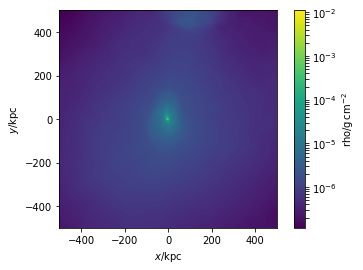

In [18]:
a=pynbody.plot.sph.image(galaxy, width=1000, units='g cm^-2') # vmin=2.6e-5, vmax=2.9e-5